In [237]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns


font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


movie=pd.read_csv('./output/project/퍼센트/영화장르_퍼센트.csv')
movieD=pd.read_csv('./output/project/퍼센트/영화세부장르_퍼센트.csv')
tvshow=pd.read_csv('./output/project/퍼센트/티비쇼장르_퍼센트.csv')
tvshowD=pd.read_csv('./output/project/퍼센트/티비쇼세부장르_퍼센트.csv')
watcha=pd.read_csv('./output/project/퍼센트/왓차장르_퍼센트.csv')
watchaD=pd.read_csv('./output/project/퍼센트/왓차세부장르_퍼센트.csv')
wavve=pd.read_csv('./output/project/퍼센트/웨이브장르_퍼센트.csv')

In [238]:
#df=pd.concat([movie,tvshow,watcha],axis=1)

movie.set_index(keys=['index'],inplace=True)
movie

,cnt,percent
index,,
액션,9.0,18.0
모혐,1.0,2.0
애니메이션,9.0,18.0
코미디,2.0,4.0
범죄,9.0,18.0
드라마,2.0,4.0
공포,9.0,18.0
스릴러,9.0,18.0


In [239]:
tvshow

,index,cnt,percent
0,액션,1.0,2.0
1,애니메이션,6.0,12.0
2,코미디,6.0,12.0
3,드라마,16.0,32.0
4,미스테리,6.0,12.0
5,퀴즈쇼,1.0,2.0
6,리얼리티,7.0,14.0
7,로맨스,3.0,6.0
8,토크쇼,4.0,8.0


In [240]:
tvshow.set_index(keys=['index'],inplace=True)

In [241]:
tvshow

,cnt,percent
index,,
액션,1.0,2.0
애니메이션,6.0,12.0
코미디,6.0,12.0
드라마,16.0,32.0
미스테리,6.0,12.0
퀴즈쇼,1.0,2.0
리얼리티,7.0,14.0
로맨스,3.0,6.0
토크쇼,4.0,8.0


In [242]:
watcha.set_index(keys=['index'],inplace=True)
watcha

,cnt,percent
index,,
드라마,75,24.92
애니메이션,47,15.61
액션,28,9.30
코미디,27,8.97
로맨스,23,7.64
범죄,17,5.65
예능,15,4.98
모험,13,4.32
판타지,10,3.32


In [243]:
wavve.set_index(keys=['index'],inplace=True)


In [244]:
wavve

,cnt,percent
index,,
액션,23,23.0
범죄,11,11.0
드라마,11,11.0
SF,10,10.0
로맨스,10,10.0
판타지,8,8.0
코미디,6,6.0
에로티시즘,5,5.0
애니메이션,5,5.0


In [245]:
df=pd.concat([movie,tvshow,watcha,wavve],axis=1)
df

,cnt,percent,cnt,percent,cnt,percent,cnt,percent
index,,,,,,,,
액션,9.0,18.0,1.0,2.0,28.0,9.30,23.0,23.0
모혐,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
애니메이션,9.0,18.0,6.0,12.0,47.0,15.61,5.0,5.0
코미디,2.0,4.0,6.0,12.0,27.0,8.97,6.0,6.0
범죄,9.0,18.0,NaN,NaN,17.0,5.65,11.0,11.0
드라마,2.0,4.0,16.0,32.0,75.0,24.92,11.0,11.0
공포,9.0,18.0,NaN,NaN,3.0,1.00,1.0,1.0
스릴러,9.0,18.0,NaN,NaN,4.0,1.33,3.0,3.0
미스테리,NaN,NaN,6.0,12.0,NaN,NaN,NaN,NaN


In [246]:
#df.apply(pd.value_counts)
df=pd.DataFrame(df.percent.sum(axis=1))
df=df.rename(columns={0:'percent'})
df

,percent
index,
액션,52.30
모혐,2.00
애니메이션,50.61
코미디,30.97
범죄,34.65
드라마,71.92
공포,20.00
스릴러,22.33
미스테리,12.00


In [248]:
df.to_csv('./output/project/통합장르퍼센트.csv')

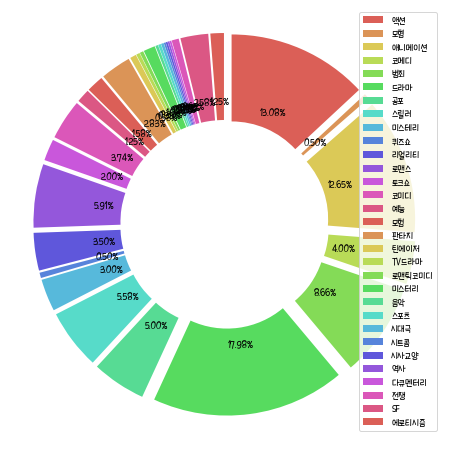

In [215]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df.index)):
    explode.append(0.1)

pie = ax.pie(df.percent,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],df.index) ## 범례 표시
plt.show()

Figure(1080x720)
AxesSubplot(0.125,0.125;0.775x0.755)


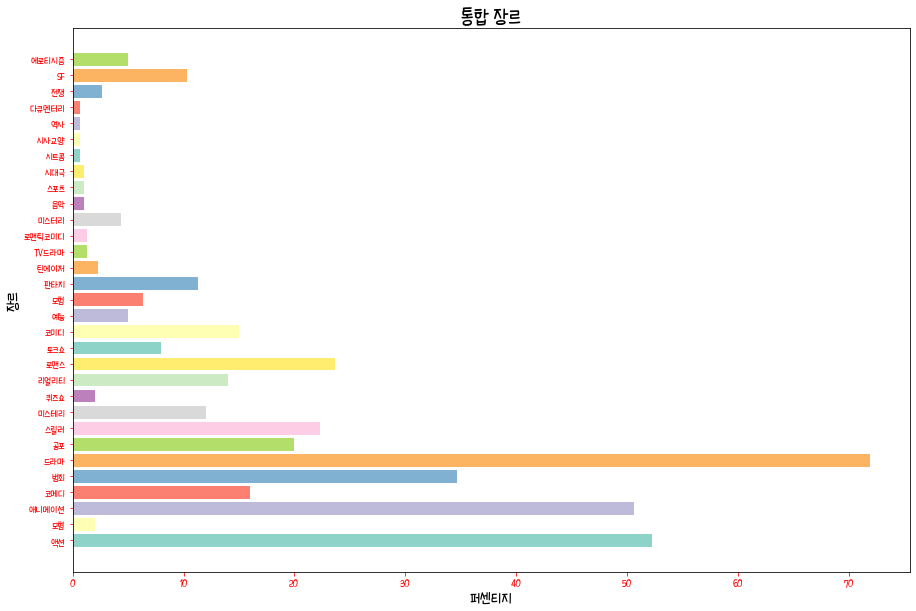

In [223]:
plt.figure(figsize=(15,10))
print(plt.gcf())
s = df

plt.title("통합 장르",size=20)
plt.xlabel('퍼센티지',size=15)
plt.ylabel('장르',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.percent, color=mycolors)
#plt.show()
plt.savefig('./output/project/통합 장르.png')

In [249]:
movieD.set_index(keys=['index'],inplace=True)
movieD

,cnt,percent
index,,
애니메이션,6.0,16.22
범죄,2.0,5.40
드라마,5.0,13.51
스릴러,10.0,27.02
코미디,2.0,5.41
로맨스,5.0,13.51
공포,2.0,5.41
좀비,5.0,13.51


In [250]:
tvshowD.set_index(keys=['index'],inplace=True)
tvshowD

,cnt,percent
index,,
애니메이션,6.0,15.79
음식,4.0,10.53
로맨틱코미디,9.0,23.69
범죄,1.0,2.63
로맨스,5.0,13.16
액션,1.0,2.63
스포츠,1.0,2.63
틴에이저,1.0,2.63
스릴러,5.0,13.16


In [251]:
watchaD.set_index(keys=['index'],inplace=True)
watchaD

,cnt,percent
index,,
드라마,55,20.07
로맨스,42,15.33
액션,27,9.85
코미디,25,9.12
모험,23,8.39
TV드라마,21,7.66
애니메이션,13,4.74
판타지,10,3.65
가족,8,2.92


In [252]:
df1=pd.concat([movieD,tvshowD,watchaD],axis=1)
df1

,cnt,percent,cnt,percent,cnt,percent
index,,,,,,
애니메이션,6.0,16.22,6.0,15.79,13.0,4.74
범죄,2.0,5.40,1.0,2.63,6.0,2.19
드라마,5.0,13.51,NaN,NaN,55.0,20.07
스릴러,10.0,27.02,5.0,13.16,4.0,1.46
코미디,2.0,5.41,NaN,NaN,25.0,9.12
로맨스,5.0,13.51,5.0,13.16,42.0,15.33
공포,2.0,5.41,NaN,NaN,3.0,1.09
좀비,5.0,13.51,NaN,NaN,NaN,NaN
음식,NaN,NaN,4.0,10.53,NaN,NaN


In [253]:
df1=pd.DataFrame(df1.percent.sum(axis=1))
df1=df1.rename(columns={0:'percent'})
df1

,percent
index,
애니메이션,36.75
범죄,10.22
드라마,33.58
스릴러,41.64
코미디,14.53
로맨스,42.00
공포,6.50
좀비,13.51
음식,10.53


In [254]:
df1.to_csv('./output/project/통합세부장르.csv')

Figure(1080x720)
AxesSubplot(0.125,0.125;0.775x0.755)


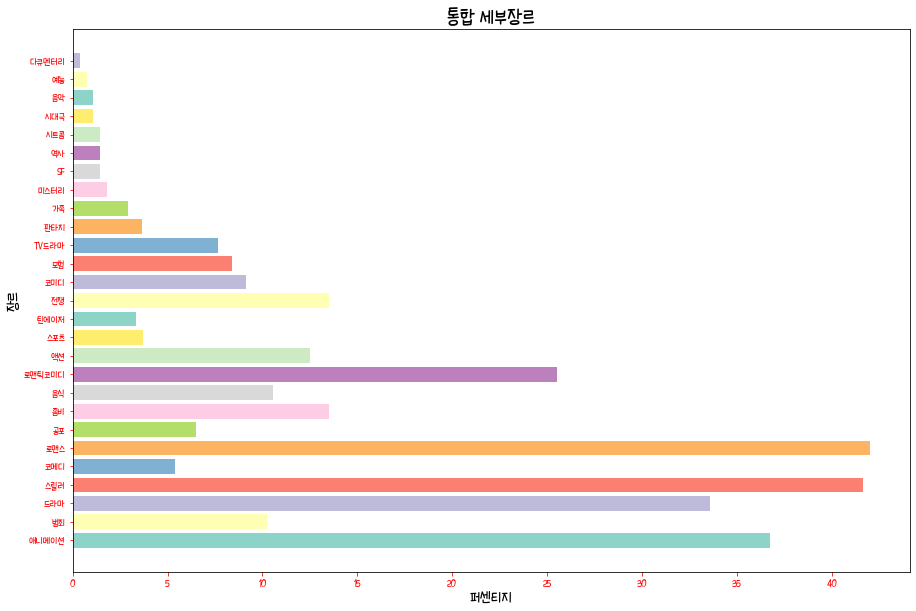

In [224]:
plt.figure(figsize=(15,10))
print(plt.gcf())
s = df1

plt.title("통합 세부장르",size=20)
plt.xlabel('퍼센티지',size=15)
plt.ylabel('장르',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.percent, color=mycolors)
#plt.show()
plt.savefig('./output/project/통합 세부장르.png')

In [200]:
sum(df.percent)
df

,percent
SF,0.33
TV드라마,1.33
공포,19.00
다큐멘터리,0.66
드라마,60.92
로맨스,13.64
로맨틱코미디,1.33
리얼리티,14.00
모험,4.32
모혐,2.00


In [201]:
sum(df1.percent)
df1

,percent
0,32.01
1,15.93
2,37.20
3,29.65
4,18.57
5,16.14
6,8.04
7,16.14
8,13.16
9,13.16


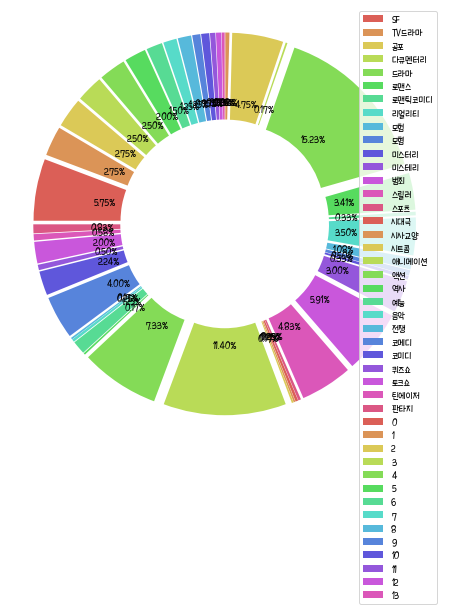

In [202]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df.index)):
    explode.append(0.1)

pie = ax.pie(df.percent,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],df.index) ## 범례 표시
plt.show()

In [203]:
cntsum=pd.DataFrame(df.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(df.percent[0]/cntsum.a)*100

df
a=[]

for i in range(len(df.index)):
    a.append((df.percent[i])/cntsum.a*100)
    
percent=[]
for i in range(len(df.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent
percent=percent.rename(columns={'percent':'percent'})
percent=percent.reset_index()
percent=percent.percent
#percent

ddf1=df.reset_index()
ddf1=pd.concat([ddf1,percent],axis=1)
ddf1.set_index('index',inplace=True)

#ddf1=ddf1.drop(ddf1.columns[0],axis=1)
ddf1

KeyError: 14

In [ ]:
cntsum=pd.DataFrame(df.sum(axis=0))
cntsum=cntsum.rename(df={0:'a'})
cntsum.a

(df.cnt[0]/cntsum.a)*100

df
a=[]
for i in range(len(df.index)):
    a.append((df.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(df.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

ddf1=df.reset_index()
ddf1=pd.concat([ddf1,percent],axis=1)
ddf1
ddf1.set_index('index',inplace=True)